# Customer Segmentation & Recommendation System

We delvep deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm.

## Objectives:
    
**Data Cleaning & Transformation:** Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

**Feature Engineering:** Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

**Data Preprocessing:** Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

**Customer Segmentation using K-Means Clustering:** Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

**Cluster Analysis & Evaluation:** Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

**Recommendation System:** Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load dataset
df = pd.read_csv('C:/Users/nitip/Downloads/e-commerce dt/data.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [10]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


## 1. Data Cleaning & Transformation

**Prepare the data by removing invalid entries:**

Handle missing values

Remove duplicates

Filter out invalid quantity and price entries

Add a new column TotalPrice

In [11]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
# drop the missing values.
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [25]:
# Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [16]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 5225


In [19]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [26]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for total price per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Show cleaned data info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HE

##  2. Feature Engineering – RFM Analysis

RFM features to quantify customer behavior:

**Recency** – How recently a customer made a purchase.

**Frequency** – How often a customer makes a purchase.

**Monetary** – How much money a customer spends.

In [29]:
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create reference date (day after the last transaction)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by CustomerID and calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

# Rename the columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Show result
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [31]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [34]:
# Apply on RFM data
rfm_cleaned = remove_outliers_iqr(rfm, ['Recency', 'Frequency', 'Monetary'])

# Show before and after
print(f"Original RFM shape: {rfm.shape}")
print(f"After outlier removal: {rfm_cleaned.shape}")

Original RFM shape: (4338, 4)
After outlier removal: (3604, 4)


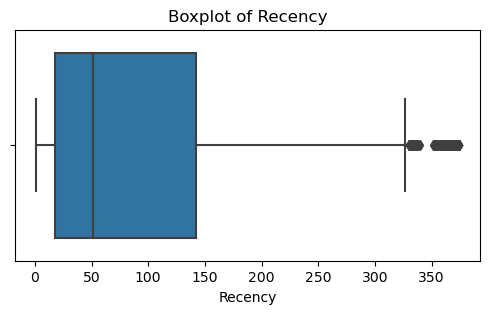

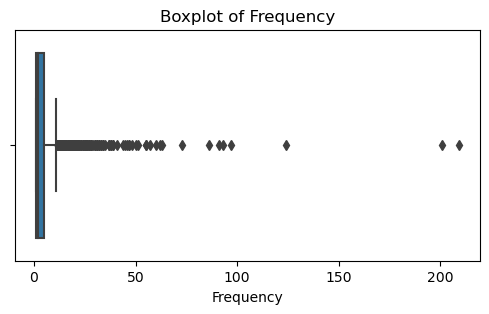

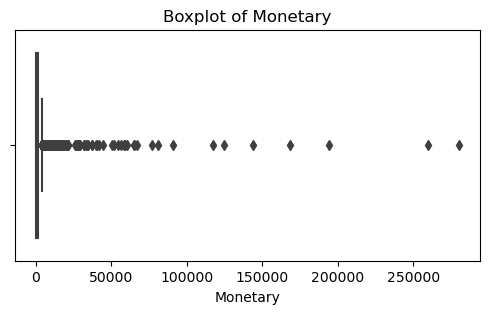

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to visualize outliers
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=rfm[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    

## 3. Data Preprocessing – Scaling & PCA

Normalize feature scales (because K-Means is distance-based)

Optionally apply PCA (Principal Component Analysis) to reduce dimensionality for faster and more effective clustering + visualization

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select RFM features
rfm_features = rfm_cleaned[['Recency', 'Frequency', 'Monetary']]

# Step 1: Feature Scaling (Standardization)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Step 2: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # reduce to 2 components for visualization
rfm_pca = pca.fit_transform(rfm_scaled)

# Create DataFrame for PCA result
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PCA1', 'PCA2'])
rfm_pca_df['CustomerID'] = rfm_cleaned['CustomerID'].values

# Show a few rows
print(rfm_pca_df.head())


       PCA1      PCA2  CustomerID
0  1.349681  0.532371     12348.0
1  0.684519 -0.436540     12349.0
2 -2.070026  1.680673     12350.0
3  3.401157  1.050915     12352.0
4 -1.743833  0.499533     12353.0


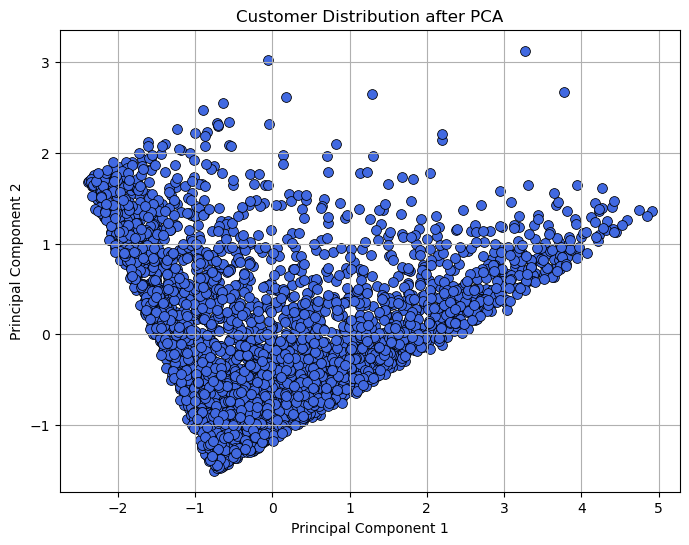

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize PCA output
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=rfm_pca_df, s=50, color='royalblue', edgecolor='k')
plt.title('Customer Distribution after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## 4. Customer Segmentation using K-Means Clustering

Apply K-Means to segment customers into groups based on their behavior

Find the optimal number of clusters using the Elbow Method

Visualize the clustered customer groups

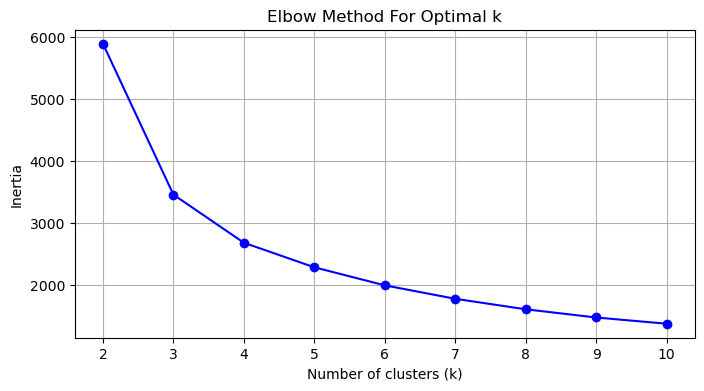

In [40]:
from sklearn.cluster import KMeans

# Try different k values
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances to closest cluster center

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


**Inertia:** Measures how tightly the data points are grouped in a cluster. Lower = better.

The "elbow" point is where adding more clusters doesn’t significantly reduce inertia — it’s often the best choice for k.

In [41]:
# Apply K-Means with Optimal k (e.g., k = 4)
# Fit KMeans with chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_cleaned['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_pca_df['Cluster'] = rfm_cleaned['Cluster'].values

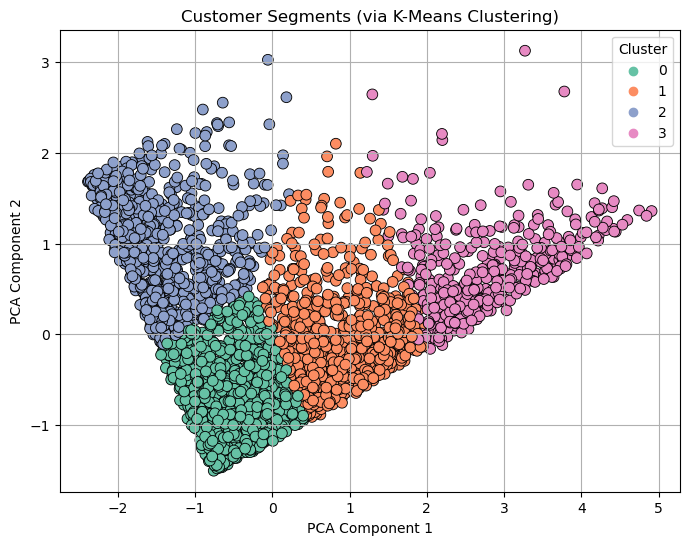

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rfm_pca_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=60, edgecolor='k'
)
plt.title('Customer Segments (via K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**Interpretation:**

Each color = a customer segment.

The clusters help group similar behavior — e.g., frequent buyers, high spenders, inactive customers, etc.

These clusters are now ready for profiling and targeted marketing.



## 5. Cluster Analysis & Profiling

Identify which clusters have high/low Recency, Frequency, or Monetary values

Assign labels like "Loyal Customers", "At-risk", etc.

In [44]:
# Average RFM values per cluster
cluster_profile = rfm_cleaned.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

# Count of customers in each cluster
cluster_counts = rfm_cleaned['Cluster'].value_counts().sort_index()

# Add cluster size to the profile
cluster_profile['Num_Customers'] = cluster_counts.values

# Display the profile
print("Cluster Profile:\n")
print(cluster_profile)

Cluster Profile:

         Recency  Frequency  Monetary  Num_Customers
Cluster                                             
0           52.0        1.6     411.0           1435
1           46.6        3.8    1210.0            861
2          231.0        1.5     398.1            872
3           32.0        6.8    2161.3            436


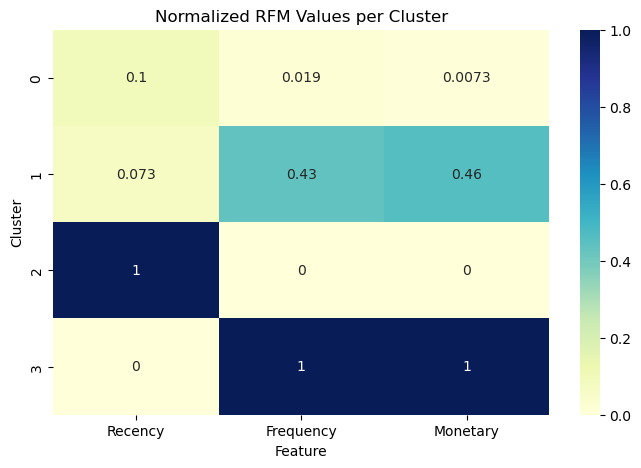

In [46]:
# Normalize the RFM features for heatmap
cluster_norm = cluster_profile[['Recency', 'Frequency', 'Monetary']]
cluster_norm = (cluster_norm - cluster_norm.min()) / (cluster_norm.max() - cluster_norm.min())

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_norm, annot=True, cmap='YlGnBu')
plt.title('Normalized RFM Values per Cluster')
plt.xlabel('Feature')
plt.ylabel('Cluster')
plt.show()

You can now label segments like:

Cluster 0: High recency → New or Infrequent Customers

Cluster 1: High frequency & monetary → More Purchase  

Cluster 2: Low frequency & monetary → At-risk or Lost

Cluster 3: Moderate activity → Regular/loyal Customers

## 6. Recommendation System

Recommend best-selling products that customers in a cluster haven’t purchased yet — boosting upselling and personalization.

1. Identify top products purchased in each cluster

2. Recommend them to others in the same cluster who haven’t bought them



In [49]:
# Merge original data with cluster labels
df_clustered = df.merge(rfm_cleaned[['CustomerID', 'Cluster']], on='CustomerID')

# Find top 5 products by cluster
top_products_by_cluster = df_clustered.groupby(['Cluster', 'Description'])['Quantity'].sum().reset_index()
top_products_by_cluster = top_products_by_cluster.sort_values(['Cluster', 'Quantity'], ascending=[True, False])

# Get top 5 products per cluster
top5_products = top_products_by_cluster.groupby('Cluster').head(5)

print("Top 5 products in each cluster:")
print(top5_products)

Top 5 products in each cluster:
       Cluster                          Description  Quantity
2101         0           POPART WOODEN PENCILS ASST      3600
3107         0    WORLD WAR 2 GLIDERS ASSTD DESIGNS      3076
182          0        ASSORTED COLOUR BIRD ORNAMENT      2834
438          0                  BROCADE RING PURSE       2538
3083         0  WOODEN HEART CHRISTMAS SCANDINAVIAN      2347
6358         1    WORLD WAR 2 GLIDERS ASSTD DESIGNS      6384
4140         1  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      5674
3358         1        ASSORTED COLOUR BIRD ORNAMENT      4885
5884         1          SMALL CHINESE STYLE SCISSOR      4681
4648         1              JUMBO BAG RED RETROSPOT      4572
6587         2            ASSORTED COLOURS SILK FAN      2612
6594         2    ASSORTED LAQUERED INCENSE HOLDERS      2067
9015         2   WHITE HANGING HEART T-LIGHT HOLDER      1707
6807         2                  BROCADE RING PURSE       1557
8713         2       SMALL CERAMIC TOP

In [52]:
# Recommendation function
def recommend_products(customer_id, df_clustered, top5_products):
    cluster_id = rfm_cleaned.loc[rfm_cleaned['CustomerID'] == customer_id, 'Cluster'].values[0]
    
    # Products this customer has bought
    purchased = df_clustered[df_clustered['CustomerID'] == customer_id]['Description'].unique()
    
    # Top products in this customer's cluster
    cluster_top = top5_products[top5_products['Cluster'] == cluster_id]['Description']
    
    # Recommend only the ones they haven't bought
    recommendations = cluster_top[~cluster_top.isin(purchased)].tolist()
    
    return recommendations

# Example: Recommend for a specific customer
sample_customer = rfm_cleaned['CustomerID'].sample(1).values[0]
print(f"Recommendations for Customer {sample_customer}:")
print(recommend_products(sample_customer, df_clustered, top5_products))

Recommendations for Customer 14753.0:
['POPART WOODEN PENCILS ASST', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'ASSORTED COLOUR BIRD ORNAMENT', 'BROCADE RING PURSE ', 'WOODEN HEART CHRISTMAS SCANDINAVIAN']


## Business Impact

1. Enables personalized marketing

2. Helps identify VIP, churn-risk, and new customers

3. Boosts sales through tailored recommendations

4. Supports strategic decision-making based on data-driven insights

## Conclusion

This project successfully segmented customers using RFM analysis and K-Means clustering, identifying key customer groups based on purchasing behavior. Data was cleaned, scaled, and reduced using PCA for efficient clustering. Each segment revealed unique traits, enabling targeted marketing strategies. A recommendation system was also implemented to suggest popular products within clusters, enhancing personalization. Overall, this approach supports data-driven decisions to boost customer engagement and sales.